<a href="https://colab.research.google.com/github/laura5186/Machine-Learning/blob/main/A9_RL_Basics_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment 9: RL Basics (Solution)
---

In this assignment, we will learn about the following concepts.

- __Agent:__ an RL agent can sense its environment and choose actions to perform in the environment
- __Environment:__ the world (simulated or real) where the agent lives in and operates
- __Action:__ the movement or other types of decisions available to the
agent
- __State:__ a snapshot of the environment at a particular point in time
  - In most cases, agent cannot access the state of the environment due to its sensing limitations. Instead, agent can only make observations of the environment. However, during RL discussions, "state" and "observation" are often used interchangeably.  
- __Observation:__ the information gathered by the agent from the state of the environment
- __Policy:__ defines the behavior of an agent by mapping states to actions
- __Reward:__ a feedback signal (immediate payoff) from the environment to each action that the agent chooses to perform; it's represented as a number (a scalar)

<br>

<p align="center">
  <img src="https://raw.githubusercontent.com/poudel-bibek/AI-Assignments/main/Images_videos/RL_Basics/1.png")
"/>
</p>

<p align="center">
  <em>Figure 1: RL pipeline. </em>
</p>

<br>

We will use OpenAI Gym ([Site](https://gymnasium.farama.org/), [GitHub](https://github.com/Farama-Foundation/Gymnasium)) to explore the concepts mentioned above.


In [ ]:
# Install gymnasium
!pip install -q gymnasium

# Download hosted code for reward callback
!wget https://raw.githubusercontent.com/poudel-bibek/AI-Assignments/main/Hosted_code/RL_Basics/rl_basics_utils.py --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 925.5/925.5 kB 13.7 MB/s eta 0:00:00


In [ ]:
# Import gym
import gymnasium as gym

Gym contains many environments (including some derived from Atari games). We will explore two [classic control environments](https://gymnasium.farama.org/environments/classic_control/):

  - __Cartpole:__  a pole is attached to a cart that moves along a frictionless track and the goal is to balance the pole by applying forces to the cart.

  - __Mountain Car:__ the goal is to drive the car to reach the top of the hill marked by a yellow flag; in order to achieve that, we need to steer the car back and forth to gain enough momentum.

<br>

<p align="center">
  <img src="https://raw.githubusercontent.com/poudel-bibek/AI-Assignments/main/Images_videos/RL_Basics/2.gif")
"/>
</p>

<p align="center">
  <em>Figure 2: An untrained agent of Mountain Car.</em>
</p>

<p align="center">
  <img src="https://raw.githubusercontent.com/poudel-bibek/AI-Assignments/main/Images_videos/RL_Basics/3.gif")
"/>
</p>

<p align="center">
  <em>Figure 3: An untrained agent of Cartpole.</em>
</p>

<br>


In [ ]:
# Create the environments
mountain_car_env = gym.make("MountainCar-v0")
cartpole_env = gym.make("CartPole-v1")

Each RL task has its own design of actions, observations, and rewards. These designs are crucial for the success of an RL task.

The design of these elements for Cartpole can be found [here](https://gymnasium.farama.org/environments/classic_control/cart_pole/).

The design of these elements for Mountain Car can be found [here](https://gymnasium.farama.org/environments/classic_control/mountain_car/).

Please carefully study the designs of the two RL tasks before you proceed.



In [ ]:
# Reset the environment to get started
mountain_car_env.reset()
cartpole_env.reset()

# Example the action space
print(f"Number of actions in Mountain Car = {mountain_car_env.action_space.n}")
print(f"Number of actions in Cartpole = {cartpole_env.action_space.n}")

Number of actions in Mountain Car = 3
Number of actions in Cartpole = 2


To advance the environment by 1 timestep, we call the `step()`.

The output includes:
  - Oservations
  - Reward for the last action taken
  - Terminated: a boolean indicating if the episode is over or not.
  - Truncated: a boolean indicating if the episode ended due to some external condition such as reaching a time limit.
  - Info: additional information (for debugging or additional analysis).

Lets explore this in the Mountain Car environment first.

In [ ]:
# Sample a random action from the action space of Mountain Car
random_action = mountain_car_env.action_space.sample()

# Take a step in Mountain Car with the random action above
observation, reward, terminated, truncated, info = mountain_car_env.step(random_action)

print(f"[Input] Action = {random_action}\n")
print(f"[Output] Observation = {observation}, shape = {observation.shape}")
print(f"[Output] Reward = {reward}")
print(f"[Output] terminated = {terminated}")
print(f"[Output] truncated = {truncated}")

[Input] Action = 2

[Output] Observation = [-0.48415253  0.00071013], shape = (2,)
[Output] Reward = -1.0
[Output] terminated = False
[Output] truncated = False


---
# Exercise 1.

- To explore the Cartpole environment, perform a sequence of 10 actions on it, five actions to move right followed by five actions to move left.

Note: *From above, we know that there are two possible discrete actions [0 and 1] in this environment.*

In [ ]:
# Define a sequence of actions as a list
action_sequence = [1,1,1,1,1,0,0,0,0,0]

terminated = False
while terminated!=True:
  for action in action_sequence:
    # Take a step in the Cartpole environment for each action
    observation, reward, terminated, truncated, info = cartpole_env.step(action)

    print(f"\nInput Action = {action}")
    print(f"Output Observation = {observation}, shape = {observation.shape}")
    print(f"Output Reward = {reward}")
    print(f"Output terminated = {terminated}")
    print(f"Output truncated = {truncated}")


Input Action = 1
Output Observation = [-0.04527082  0.14884771 -0.04622246 -0.26220784], shape = (4,)
Output Reward = 1.0
Output terminated = False
Output truncated = False

Input Action = 1
Output Observation = [-0.04229387  0.34459794 -0.05146661 -0.56910414], shape = (4,)
Output Reward = 1.0
Output terminated = False
Output truncated = False

Input Action = 1
Output Observation = [-0.03540191  0.54040253 -0.06284869 -0.8775466 ], shape = (4,)
Output Reward = 1.0
Output terminated = False
Output truncated = False

Input Action = 1
Output Observation = [-0.02459386  0.7363197  -0.08039963 -1.1893076 ], shape = (4,)
Output Reward = 1.0
Output terminated = False
Output truncated = False

Input Action = 1
Output Observation = [-0.00986746  0.9323864  -0.10418578 -1.5060695 ], shape = (4,)
Output Reward = 1.0
Output terminated = False
Output truncated = False

Input Action = 0
Output Observation = [ 0.00878027  0.738671   -0.13430718 -1.2476473 ], shape = (4,)
Output Reward = 1.0
Output 

/usr/local/lib/python3.9/dist-packages/gymnasium/envs/classic_control/cartpole.py:180: UserWarning: WARN: You are calling 'step()' even though this environment has already returned terminated = True. You should always call 'reset()' once you receive 'terminated = True' -- any further steps are undefined behavior.
  logger.warn(


Note: In an RL task, instead of sampling a random action, the agent will get its action from a trained policy using the observations as input.

Next, let's examine the observation space.

In [ ]:
# Reset the environment to obtain initial observations
initial_cartpole_obs =  cartpole_env.reset()[0]
initial_mountain_obs = mountain_car_env.reset()[0]

print(f"Cartpole Observation = {initial_cartpole_obs}, shape = {initial_cartpole_obs.shape}")
print(f"Mountain Car Observation = {initial_mountain_obs}, shape = {initial_mountain_obs.shape}")

Cartpole Observation = [ 0.04013013 -0.01062501  0.01388073  0.03565482], shape = (4,)
Mountain Car Observation = [-0.53141993  0.        ], shape = (2,)


In [ ]:
# The observation space has limits on how high or low the values can be
print(f"Observation limits of Cartpole: \n max ={cartpole_env.observation_space.low} \n min ={cartpole_env.observation_space.high}\n")
print(f"Observation limits of Mountaincar: \n max ={mountain_car_env.observation_space.low} \n min ={mountain_car_env.observation_space.high}")

Observation limits of Cartpole: 
 max =[-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38] 
 min =[4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]

Observation limits of Mountaincar: 
 max =[-1.2  -0.07] 
 min =[0.6  0.07]


---
# Exercise 2.

Explore the [Acrobot](https://gymnasium.farama.org/environments/classic_control/acrobot/) environment:
- How many actions can you take? What are the they?
- Reset the environment, what are the observations? What are the upper and lower limits of the observation space?
- Sample a random action from action space and take a step in the environment. What reward did you get for taking this action?

In [ ]:
# Create the environment
acrobot_env = gym.make("Acrobot-v1")

# Number of actions that can be taken
print(f"Number of actions that can be taken: {acrobot_env.action_space.n}")

# Reset
initial_observation = acrobot_env.reset()
print(f"Initial Observation: \n{initial_observation}")

# Observation space, shape and limits
print(f"Observation limits of Actobot: \n max ={acrobot_env.observation_space.low} \n min ={acrobot_env.observation_space.high}")

# sample a random action
random_action = acrobot_env.action_space.sample()
print(f"Random action taken: {random_action}")

# Take a step in the environment and look at the reward
observation, reward, terminated, truncated, info = acrobot_env.step(random_action)
print(f"Reward: {reward}")

Number of actions that can be taken: 3
Initial Observation: 
(array([ 0.99762833,  0.0688308 ,  0.9981878 , -0.06017582,  0.03200718,
        0.01717233], dtype=float32), {})
Observation limits of Actobot: 
 max =[ -1.        -1.        -1.        -1.       -12.566371 -28.274334] 
 min =[ 1.        1.        1.        1.       12.566371 28.274334]
Random action taken: 2
Reward: -1.0


Since an RL agent's goal is to maximize the cumulative reward and reward is the only feedback signal that an agent will receive from the environment, reward design is the key to all RL tasks.  

One way to evaluate the learning progress of an agent is to plot its reward trend, which is also known as Learning Curve. An upward trending learning curve indicates that the agent is learning to perform the task effectively. For example, the following figure obtained from the [DQN](https://www.nature.com/articles/nature14236) paper shows the agent is learning to play the Atari game Space Invaders.


<p align="center">
  <img src="https://raw.githubusercontent.com/poudel-bibek/AI-Assignments/main/Images_videos/RL_Basics/4.png")
"/>
</p>
<p align="center">
  <em>Figure 4: An example learning curve. Y-axis is showing the reward gained by the agent. X-axis is showing the training time (measured in epochs). </em>
</p>



For this assignment, we will not delve deep into the training of an agent, instead, we will showcase how easy it is to train agents using [Stable Baselines 3](https://github.com/DLR-RM/stable-baselines3) which was also developed by OpenAI and offers a wide variety of RL algorithms.

We will utilize the state-of-the-art [PPO Algorithm](https://openai.com/blog/openai-baselines-ppo/) to train agents for the Cartpole and Mountain Car environments and observe videos of thier performance in an episode.

In [ ]:
# Install Stable Baselines 3, may take upto a minute or so to install
!pip3 install git+https://github.com/JY251/stable-baselines3.git pyglet==1.5.27 --quiet

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.7 MB/s eta 0:00:00


In [ ]:
import os
import numpy as np

# import legacy gym (Works readily with Stable baselines)
import gym
from gym.spaces.discrete import Discrete

# Import SB3, PPO and helper functions from SB3
import stable_baselines3
from stable_baselines3 import PPO
from stable_baselines3.ppo import MlpPolicy
from stable_baselines3.common.evaluation import evaluate_policy

# Dependencies to monitor environment
from rl_basics_utils import RewardCallback
from stable_baselines3.common.monitor import Monitor

# Since the codebase we are using (Gym and Stable Baselines) are in a transition phase, we will get some warnings.
# Ignore them
import warnings
warnings.simplefilter("ignore")

# Plots
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Create again incase instance was restarted
cartpole_env = gym.make("CartPole-v1")
cartpole_env.action_space = Discrete(2)

# Create log dir
log_dir_c = "tmp_c/"
os.makedirs(log_dir_c, exist_ok=True)

# Create a environment wrapper that is monitered
cartpole_env_monitor = Monitor(cartpole_env, log_dir_c)

We will train policies that are approximated by Multi layered Perceptrons. Training for 20,000 timesteps for Cartpole environment (takes upto a minute to train).

In [ ]:
# Define an agent for the environment
agent_for_cartpole = PPO(MlpPolicy, cartpole_env_monitor, verbose=0)

# Instantiate callback
reward_callback_c = RewardCallback(check_freq=200, log_dir=log_dir_c) # Check every 200 episodes

# Training for Cartpole
print("Training agent for Cartpole")
agent_for_cartpole.learn(total_timesteps=20000, callback=reward_callback_c)

Training agent for Cartpole
Num timesteps: 200
Mean reward of last 200 episodes: 23.75

Num timesteps: 400
Mean reward of last 200 episodes: 22.82

Num timesteps: 600
Mean reward of last 200 episodes: 23.60

Num timesteps: 800
Mean reward of last 200 episodes: 22.49

Num timesteps: 1000
Mean reward of last 200 episodes: 23.62

Num timesteps: 1200
Mean reward of last 200 episodes: 22.92

Num timesteps: 1400
Mean reward of last 200 episodes: 23.22

Num timesteps: 1600
Mean reward of last 200 episodes: 23.49

Num timesteps: 1800
Mean reward of last 200 episodes: 23.30

Num timesteps: 2000
Mean reward of last 200 episodes: 23.22

Num timesteps: 2200
Mean reward of last 200 episodes: 23.55

Num timesteps: 2400
Mean reward of last 200 episodes: 23.50

Num timesteps: 2600
Mean reward of last 200 episodes: 24.23

Num timesteps: 2800
Mean reward of last 200 episodes: 24.55

Num timesteps: 3000
Mean reward of last 200 episodes: 24.74

Num timesteps: 3200
Mean reward of last 200 episodes: 24.61



---
# Exercise 3.
- Use [Matplotlib](https://matplotlib.org/3.5.3/index.html) to plot the reward that was obtained during training.
- Does the reward go up over time?

In [ ]:
# Fetch the data
# Skip first two rows (log info) and select just rewards
reward_data = np.asarray(pd.read_csv(log_dir_c+'/monitor.csv', skiprows=[0,1]).iloc[:, 0])

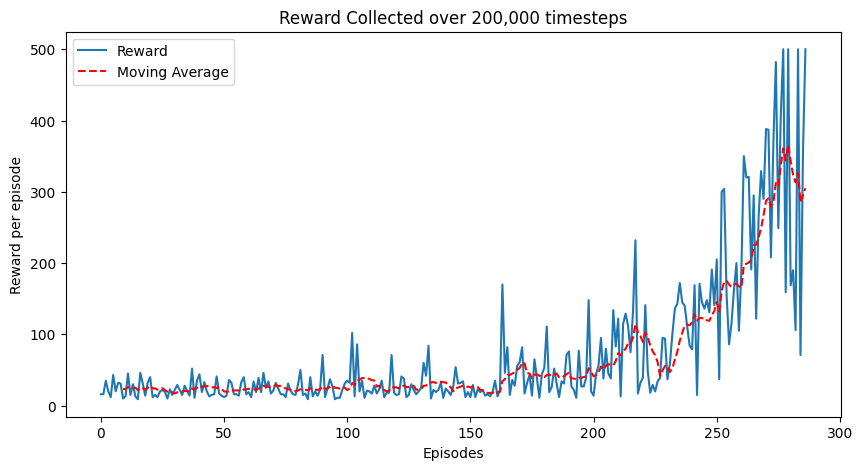

In [ ]:
fig, ax = plt.subplots(figsize = (10,5))
x = len(reward_data)
ax.plot(range(x), reward_data, label='Reward')

# Plot moving average
rewards_series = pd.Series(reward_data)
ax.plot(rewards_series.rolling(window=10).mean(), label='Moving Average', linestyle='--', color='r')

ax.set_title(f"Reward Collected over 200,000 timesteps")
ax.set_xlabel("Episodes")
ax.set_ylabel("Reward per episode")
ax.legend()
plt.show()

Example reward:

<p align="center">
  <img src="https://raw.githubusercontent.com/poudel-bibek/AI-Assignments/main/Images_videos/RL_Basics/5.png")
"/>
</p>
<p align="center">
  <em>Figure 4: An example learning curve. Y-axis is showing the reward gained by the agent. X-axis is showing the training time (measured in epochs). The red line is the moving average.</em>
</p>

Notice that the plot goes > 300 episodes, thats because we specified 200,000 timesteps to train for and not the number of episodes to train.

-------
Next, we see evaluate the trained agent to observe how "good" our agent has become after training. To do so, we look at the mean reward over a 100 episodes.

In [ ]:
# Evaluate the policy for 100 episodes and observe mean reward
mean_reward, std_reward = evaluate_policy(agent_for_cartpole, cartpole_env, n_eval_episodes=100)
print(f'Mean reward over 100 episodes of the trained policy in Cartpole environment: {mean_reward:.2f}')

Mean reward over 100 episodes of the trained policy in Cartpole environment: 500.00


Is the mean reward over 100 episodes that you observed above expected from a trained agent that solves the task?

---
# Bonus:
- Record a video of trained policy rollout

In [ ]:
# Install some dependencies to record environment render
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1
!pip install -q colabgymrender==1.0.2
!pip install -q imageio==2.4.1

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 34.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
moviepy 1.0.3 requires imageio<3.0,>=2.5; python_version >= "3.4", but you have imageio 2.4.1 which is incompatible.


In [ ]:
# Video recorder
from colabgymrender.recorder import Recorder

In [ ]:
# Code for video render
if not os.path.exists('video'):
   os.makedirs('./video')

def video_render(env, agent):
  recorder_env = Recorder (env, f'./video')
  observation = recorder_env.reset()
  terminated = False

  while not terminated:
    action = agent.predict(observation)[0]
    observation, reward, terminated, info = recorder_env.step(action)

  return recorder_env

In [ ]:
# Rollout and episode to get a render
recorded_env = video_render(cartpole_env, agent_for_cartpole)
recorded_env.play()

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


### Example results are shown below.

<p align="center">
  <img src="https://user-images.githubusercontent.com/96804013/152689694-f72560fd-cbc1-4f55-87fc-c5e21655d667.gif")
"/>
</p>

<p align="center">
  <em>Figure 5: Performance of an agent of Cartpole during training.</em>
</p>


